# TEAM 2- FLIPKART REVIEWS SENTIMENT ANALYSIS

# LOAD THE LIBRARY

In [ ]:
# Import library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns #Data Visualization
from sklearn.feature_extraction.text import TfidfVectorizer #transforms a collection of text documents to a matrix of TF-IDF features
import matplotlib.pyplot as plt # Data Visualization
from wordcloud import WordCloud # create such word cloud visualizations

In [ ]:
import nltk #
nltk.download('stopwords') #Stopwords are common words (such as "the," "and," "is," "in," etc.), don't have value in NLP (Natural language Processing)
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# LOAD DATASET

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# /content/drive/MyDrive/TEAM2_495/
path = "flipkart_data.csv"
data = pd.read_csv(path)
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


# OVERVIEW


In [ ]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2])

In [ ]:
# missing values
data.isnull().sum()

review    0
rating    0
dtype: int64

In [ ]:
# Descriptive statistical measures of the dataset.
from prettytable import PrettyTable

table_data = data.describe().T

# Create a PrettyTable with bold and larger font title

table = PrettyTable(list(table_data.columns))
table.align = 'r'  # Right-align the data
table.title = 'Flipkart Statistical Summary'
table.title_style = {'bold': True, 'font-size': '30x'}

# Add data to the table row by row

for row in table_data.itertuples():
    table.add_row(row[1:])

print(table)

+------------------------------------------------------------------------------+
|                         Flipkart Statistical Summary                         |
+--------+-------------------+-------------------+-----+-----+-----+-----+-----+
|  count |              mean |               std | min | 25% | 50% | 75% | max |
+--------+-------------------+-------------------+-----+-----+-----+-----+-----+
| 9976.0 | 4.215417000801924 | 1.167911353164182 | 1.0 | 4.0 | 5.0 | 5.0 | 5.0 |
+--------+-------------------+-------------------+-----+-----+-----+-----+-----+


# GENERAL ANALYSIST

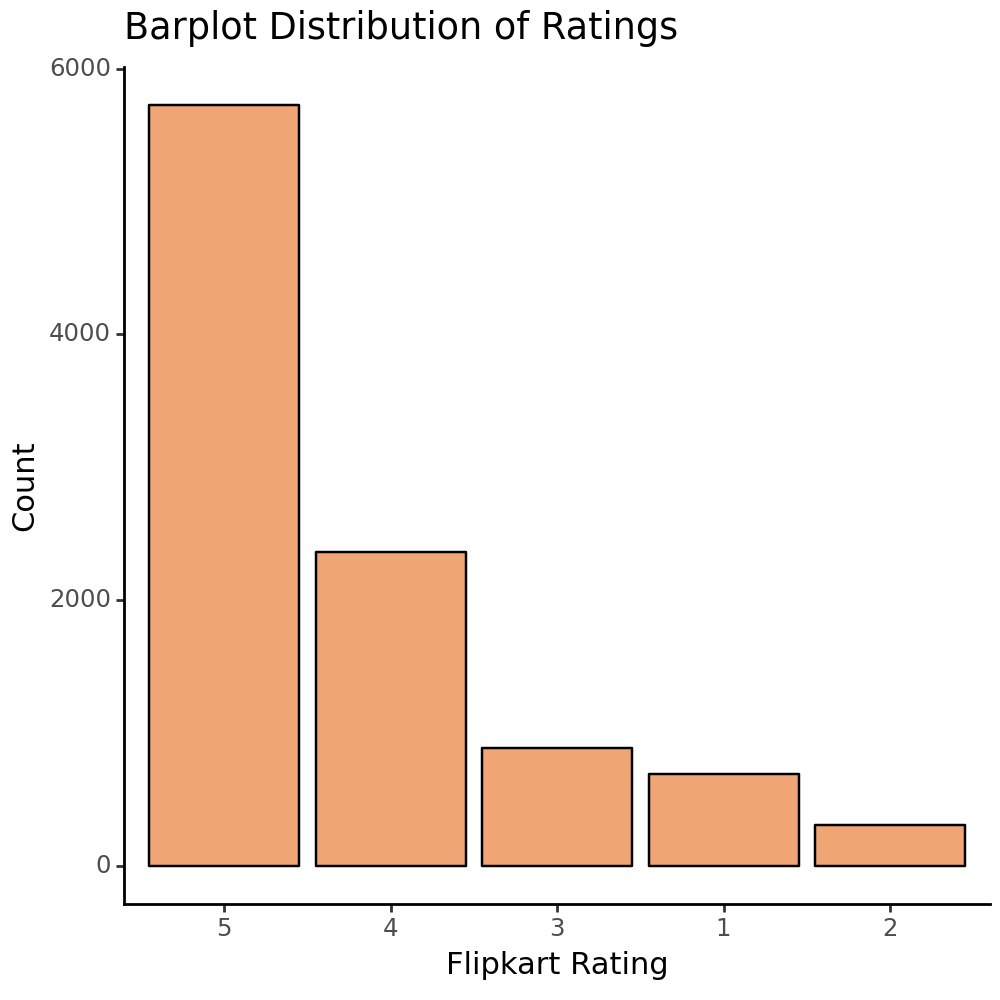

In [ ]:
# Bar plot counting the number of rating
from plotnine.themes.theme_classic import theme_classic
from plotnine import ggplot, aes, geom_bar, labs, theme
import pandas as pd

data['rating'] = pd.Categorical(data['rating'], categories = [5, 4, 3, 1, 2], ordered = True)

Flipkart = (ggplot(data, aes(x = 'rating'))
            + geom_bar(fill = '#E98038', color = 'black', alpha = 0.7, position = 'stack')
            + labs(title = "Barplot Distribution of Ratings", x = 'Flipkart Rating', y = 'Count')
            + theme_classic()
            + theme(figure_size=(5, 5)))

print(Flipkart)

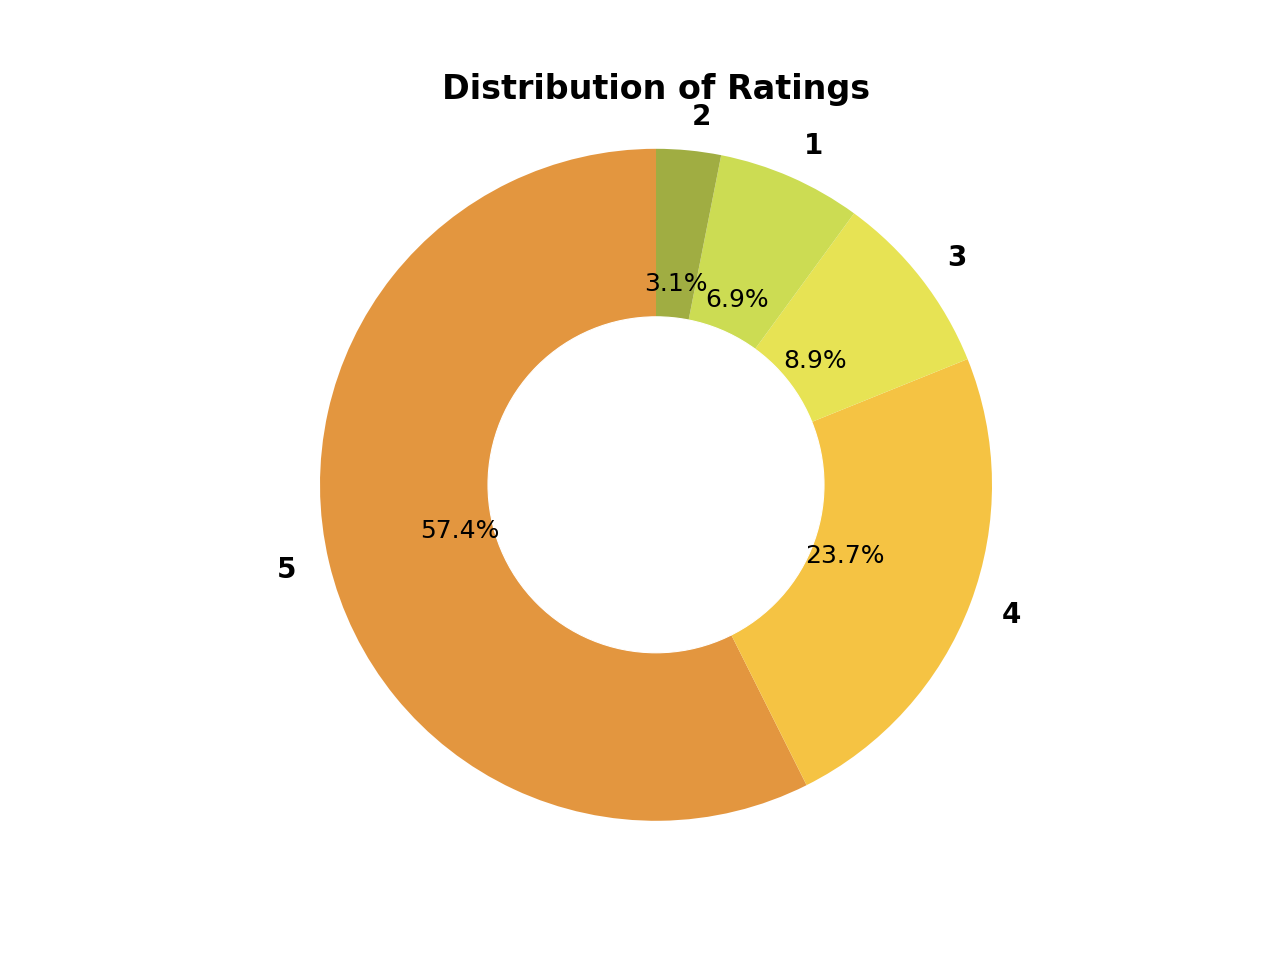

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named "data" with a "rating" column
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

# Define the hex codes for the fill colors
colors = ["#E3963F","#F5C343","#E7E354","#CCDC53","#A0AD42"]

# Create a pie chart with a hole in the middle
figure, ax = plt.subplots()

# Outer ring (pie chart) with specified colors
wedges, texts, autotexts = ax.pie(
    quantity, labels=numbers, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6), colors=colors
)

# Inner circle (hole)
centre_circle = plt.Circle((0, 0), 0.5, color='white', edgecolor='black', linewidth=0.4)
ax.add_patch(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title to the pie chart
ax.set_title('Distribution of Ratings', weight='bold')

# Improve readability by adjusting the position of the labels
for text, autotext in zip(texts, autotexts):
    text.set(color='black', size=10, weight='bold')
    autotext.set(color='black', size=9)

# Display the plot
plt.show()


In [ ]:
# Rating label
# create a new rows call "label",put 0 for negative post, and 1 for possitive post
pos_neg = []
for i in range(len(data['rating'])):
	if data['rating'][i] >= 5:
		pos_neg.append(1)
	else:
		pos_neg.append(0)

data['label'] = pos_neg
data.head(5)

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [ ]:
from tqdm import tqdm


def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		# Removing punctuations  and special characters from the sentence
		sentence = re.sub(r'[^\w\s]', '', sentence) #[^\w\s] matches any character that is not a word character (letter, digit, or underscore) or whitespace

		# Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower()
										for token in nltk.word_tokenize(sentence)
										if token.lower() not in stopwords.words('english')))

	return preprocessed_text

In [ ]:
import nltk
nltk.download('punkt') #breaking text into words or tokens
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████| 9976/9976 [00:32<00:00, 303.72it/s]


In [ ]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


In [ ]:
data["label"].value_counts()

1    5726
0    4250
Name: label, dtype: int64

In [ ]:
# # check duplicate
# print(data.shape)
# data.drop_duplicates(inplace=True)
# print(data.shape)

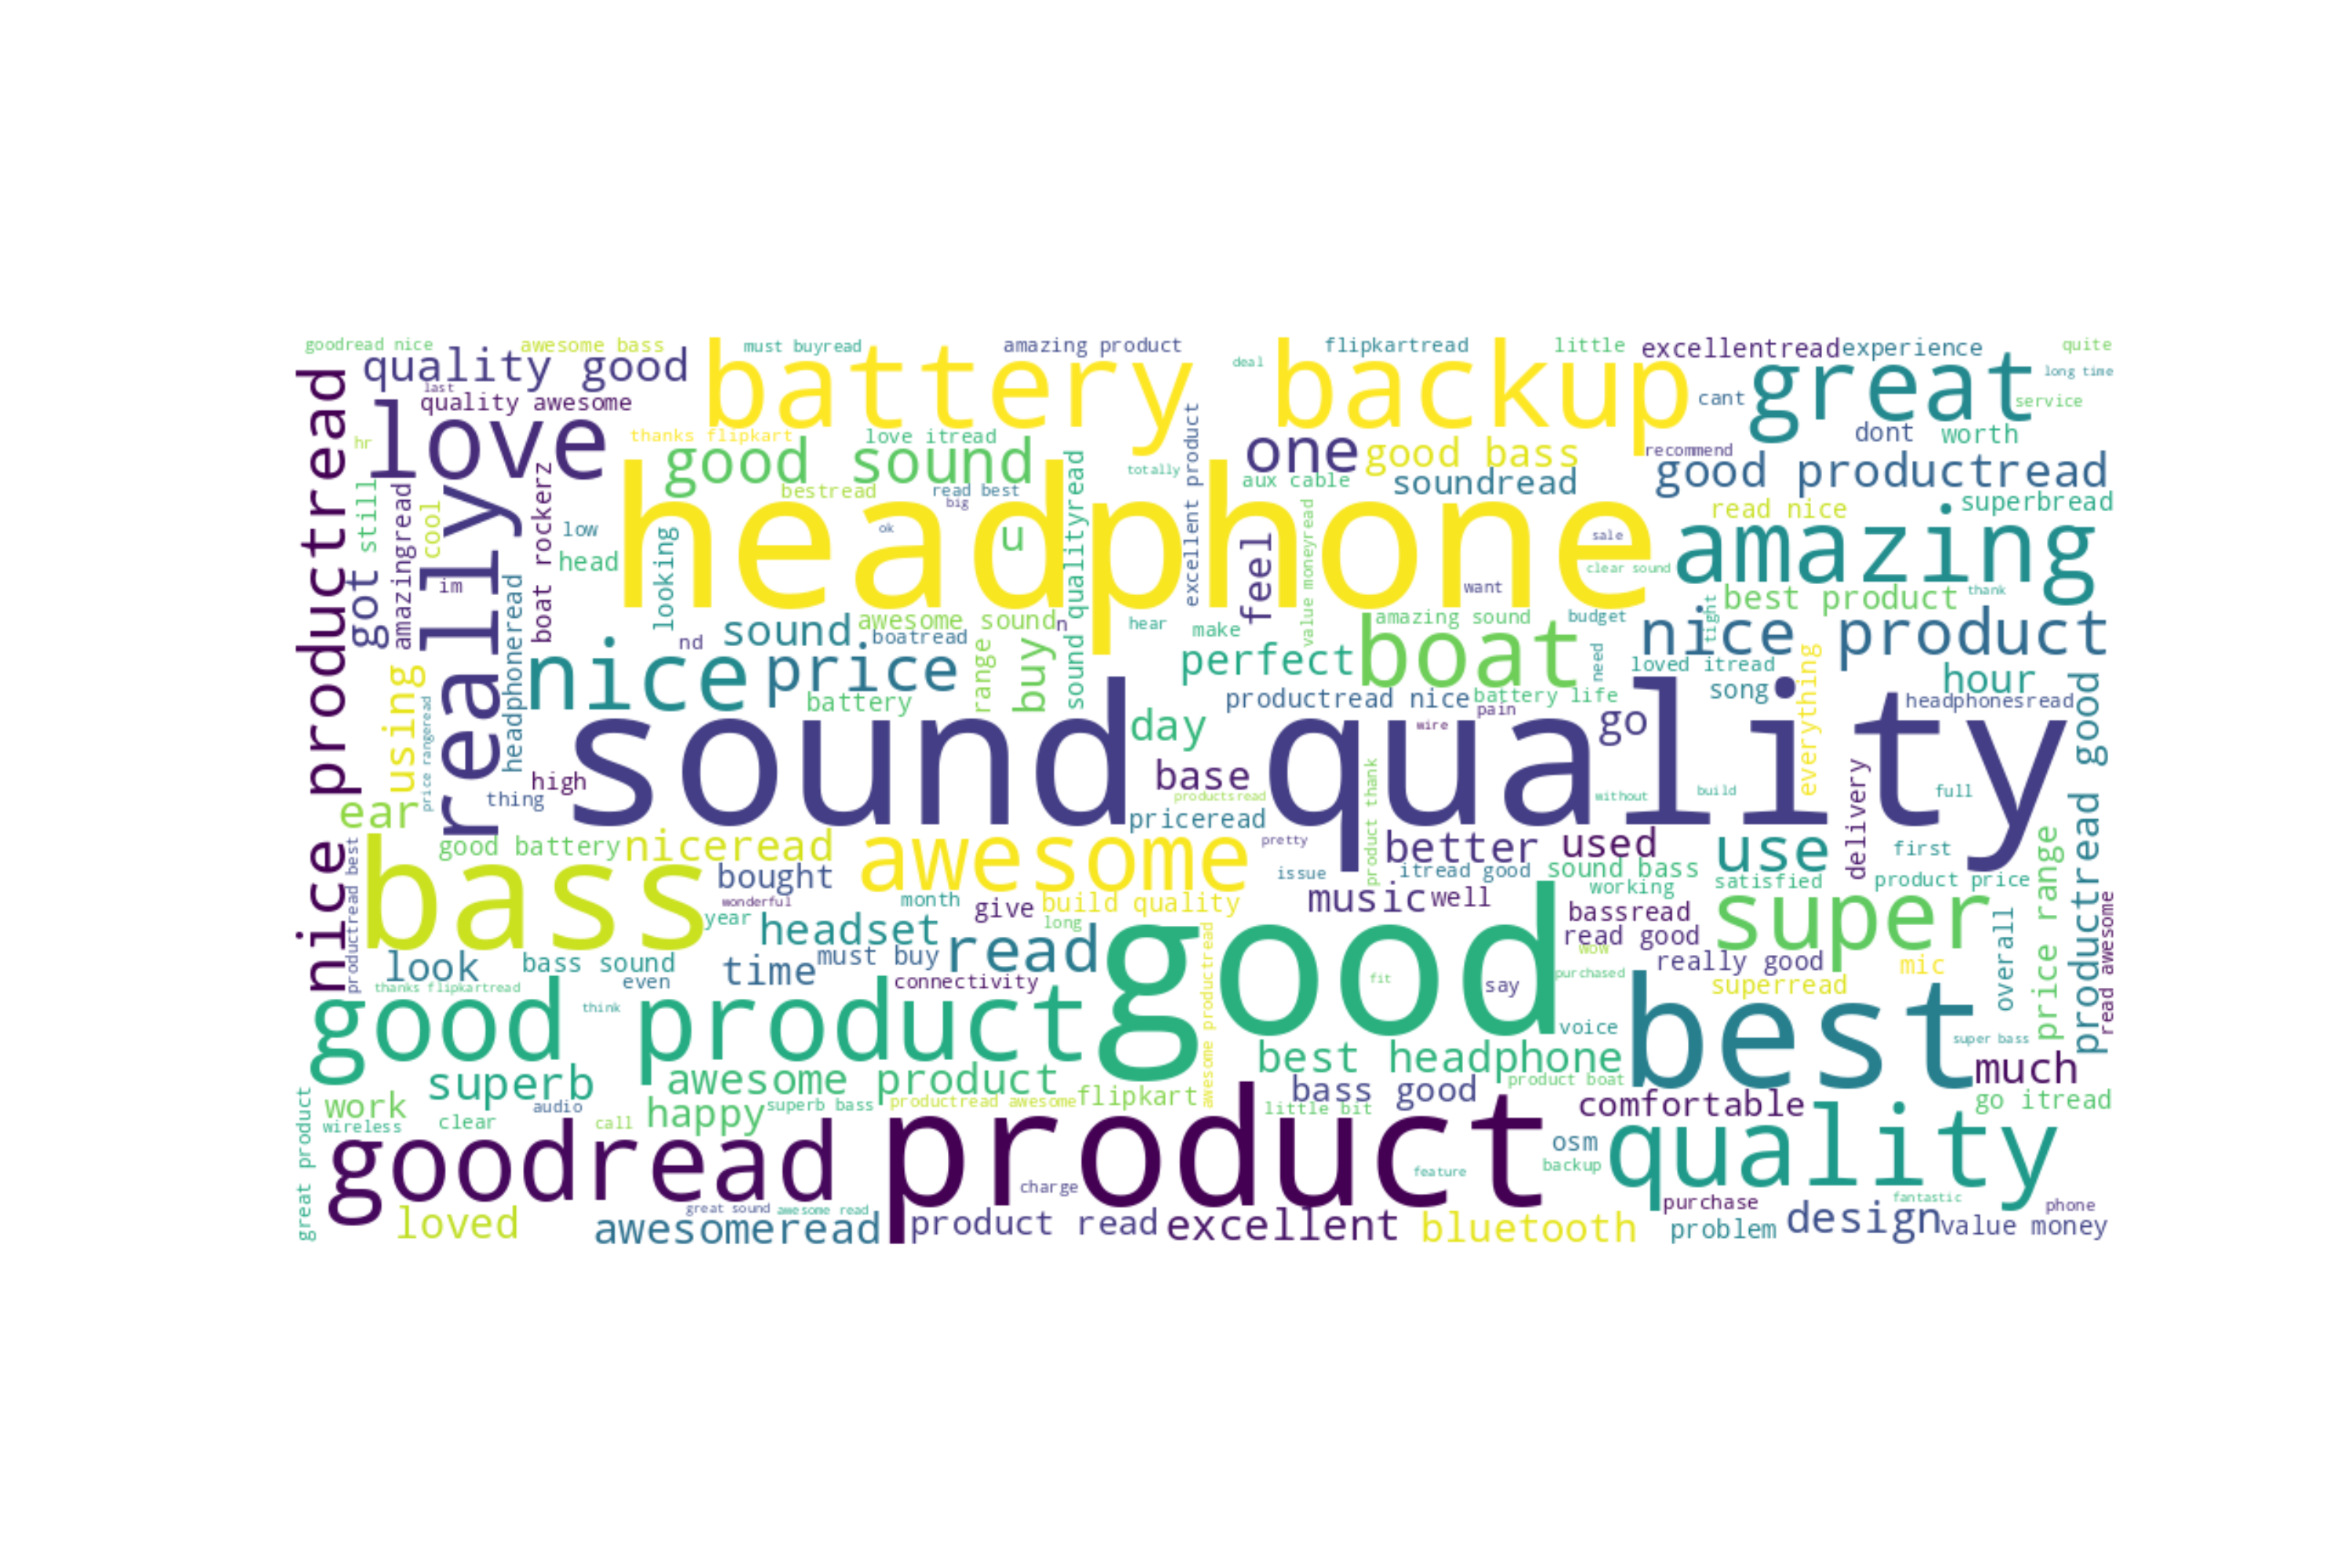

In [ ]:
consolidated = ' '.join(
	word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1000, height=500,
					random_state=21,background_color = 'white', max_font_size=110, colormap="viridis")
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 10 COMMON WORDS WITH LABEL "1" (POSSITIVE)
from collections import Counter
# Filter the DataFrame to select rows with Label=1
label_1_df = data[data['label'] == 1]
# Combine the text from these rows into a single string
text_for_label_1 = ' '.join(label_1_df['review'])
# Tokenize the text into words
words = text_for_label_1.split()
# Count the occurrences of each word
word_counts = Counter(words)
# Find the most repeated words
most_common_words = word_counts.most_common(10)
# Display
print("Most common words in 'Text' with Label=1:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most common words in 'Text' with Label=1:
good: 2169
product: 1548
sound: 1379
quality: 1301
bass: 979
nice: 935
best: 835
awesome: 722
productread: 688
read: 629


In [ ]:
# 10 COMMON WORDS WITH LABEL "0" (NEGATIVE)
# Filter the DataFrame to select rows with Label=1
label_0_df = data[data['label'] == 0]

# Combine the text from these rows into a single string
text_for_label_0 = ' '.join(label_0_df['review'])

# Tokenize the text into words
words = text_for_label_0.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Find the most repeated words
most_common_words = word_counts.most_common(10)

print("Most common words in 'Text' with Label=0:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most common words in 'Text' with Label=0:
good: 2080
sound: 1295
quality: 1188
product: 1003
bass: 681
nice: 470
bluetooth: 417
battery: 409
use: 363
productread: 360


In [ ]:
# Convert text to numberic array ()
cv = TfidfVectorizer(max_features=2500) #limit the number of features (words or terms) to the top 2500 most frequent terms in the document collection

X = cv.fit_transform(data['review'] ).toarray() # calculate the TF-IDF score of each words

In [ ]:
X # The feature matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(9976, 2500)

# MACHINE LEARNING MODEL

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
													test_size=0.33,
													stratify=data['label'],
                          random_state = 42)

## DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model on the test set
pred = model.predict(X_test)
a=accuracy_score(y_test,pred)
print(f"Accuracy of the Decision Tree model: {a * 100:.2f}%")

Accuracy of the Decision Tree model: 67.72%


In [ ]:
from sklearn.metrics import accuracy_score , roc_curve, auc
# Define a function to display accuracy and AUC
def compute_accuracy_AUC(Model, y_test, y_hat, pred_prob):
    accuracy = accuracy_score(y_test, y_hat)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
    AUC = auc(fpr, tpr)
    print(f'{Model} model has accuracy {accuracy}, AUC {AUC}')
    return accuracy, AUC

#testing the model on the test set
y_pred= model.predict(X_test)
y_prob= model.predict_proba(X_test)
model_accuracy, model_AUC = compute_accuracy_AUC('Decision Tree', y_test, y_pred,  y_prob)

Decision Tree model has accuracy 0.6771940479805648, AUC 0.6733786632574943


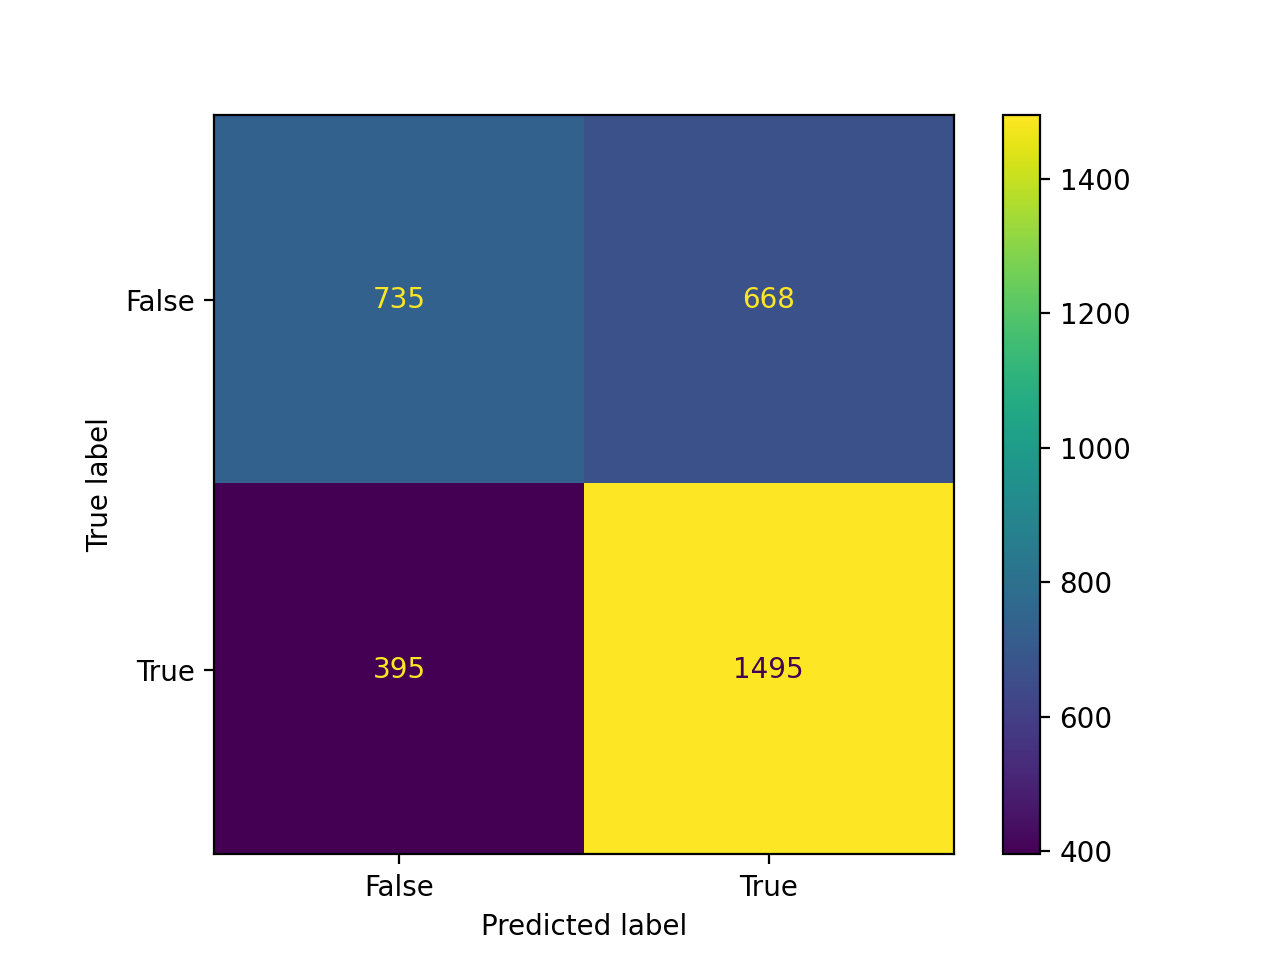

In [ ]:
# Create a confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()

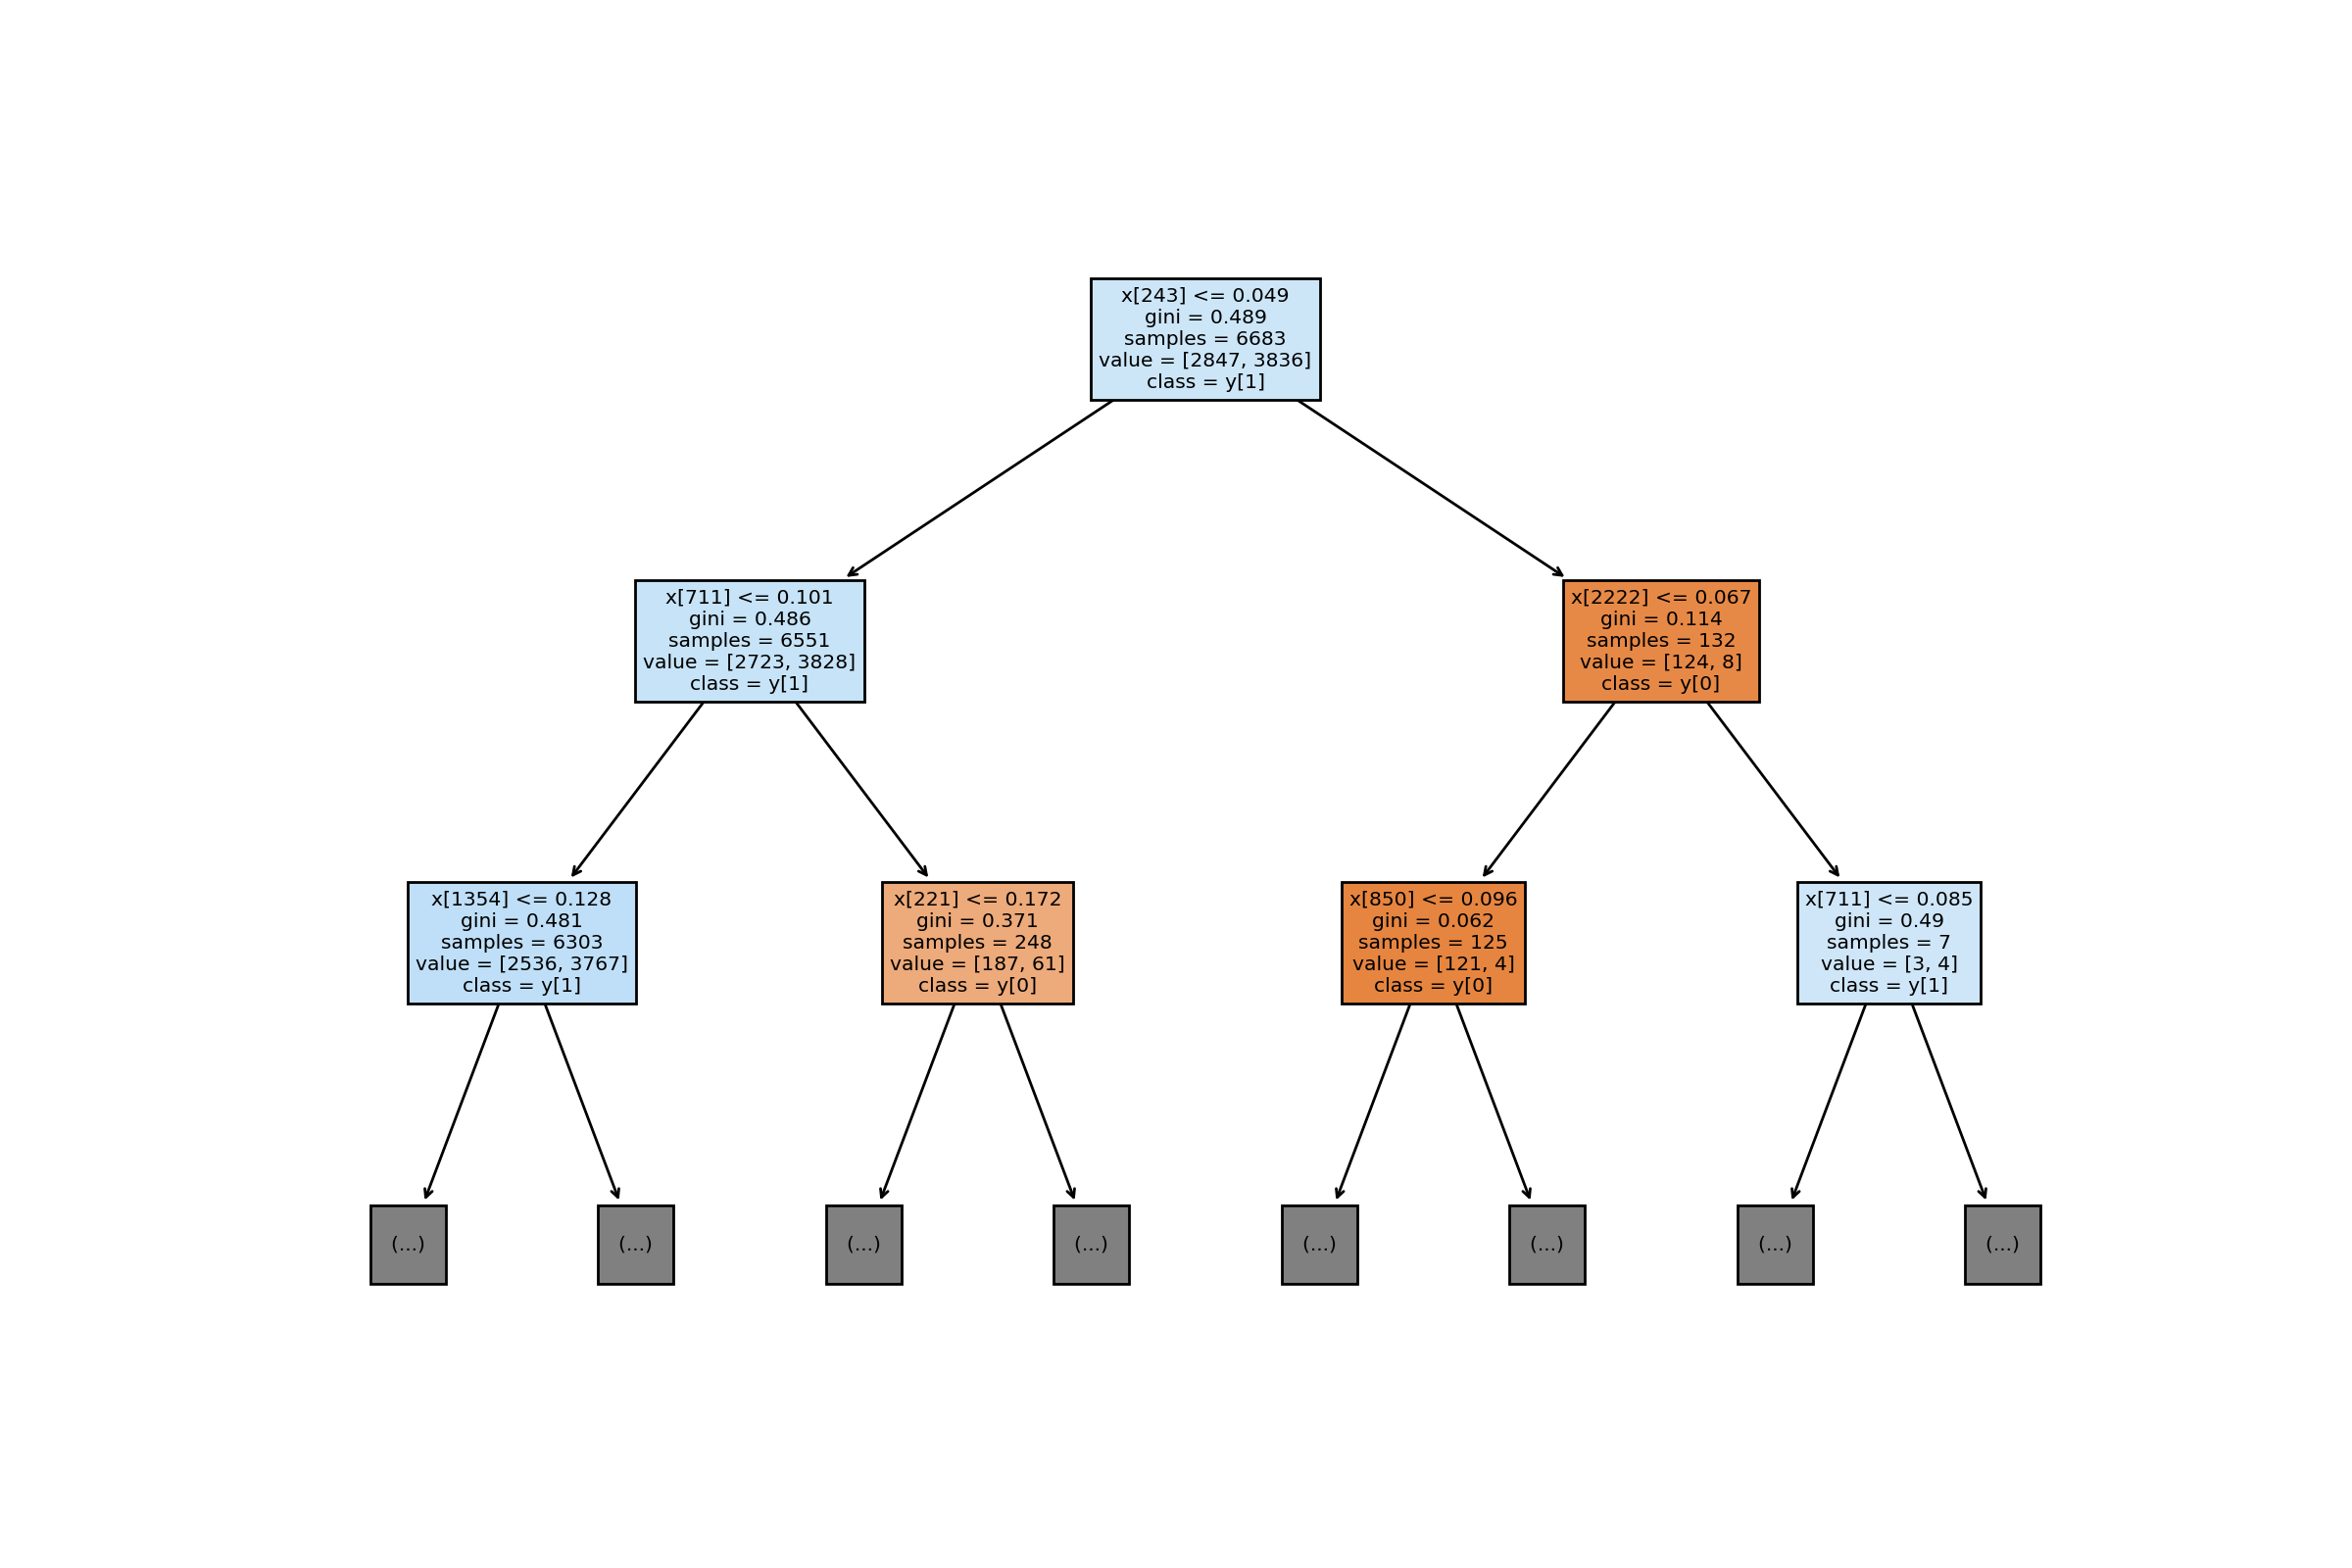

In [ ]:
# Visualization of the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, class_names=True,max_depth=2)
plt.show()

## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
# fit the model
lr_model = LogisticRegression(random_state=0)
lr_model=lr_model.fit(X_train, y_train)
# Predict the sentiment on the test data
y_pred = lr_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy * 100:.2f}%")


Accuracy of the Logistic Regression model: 73.09%


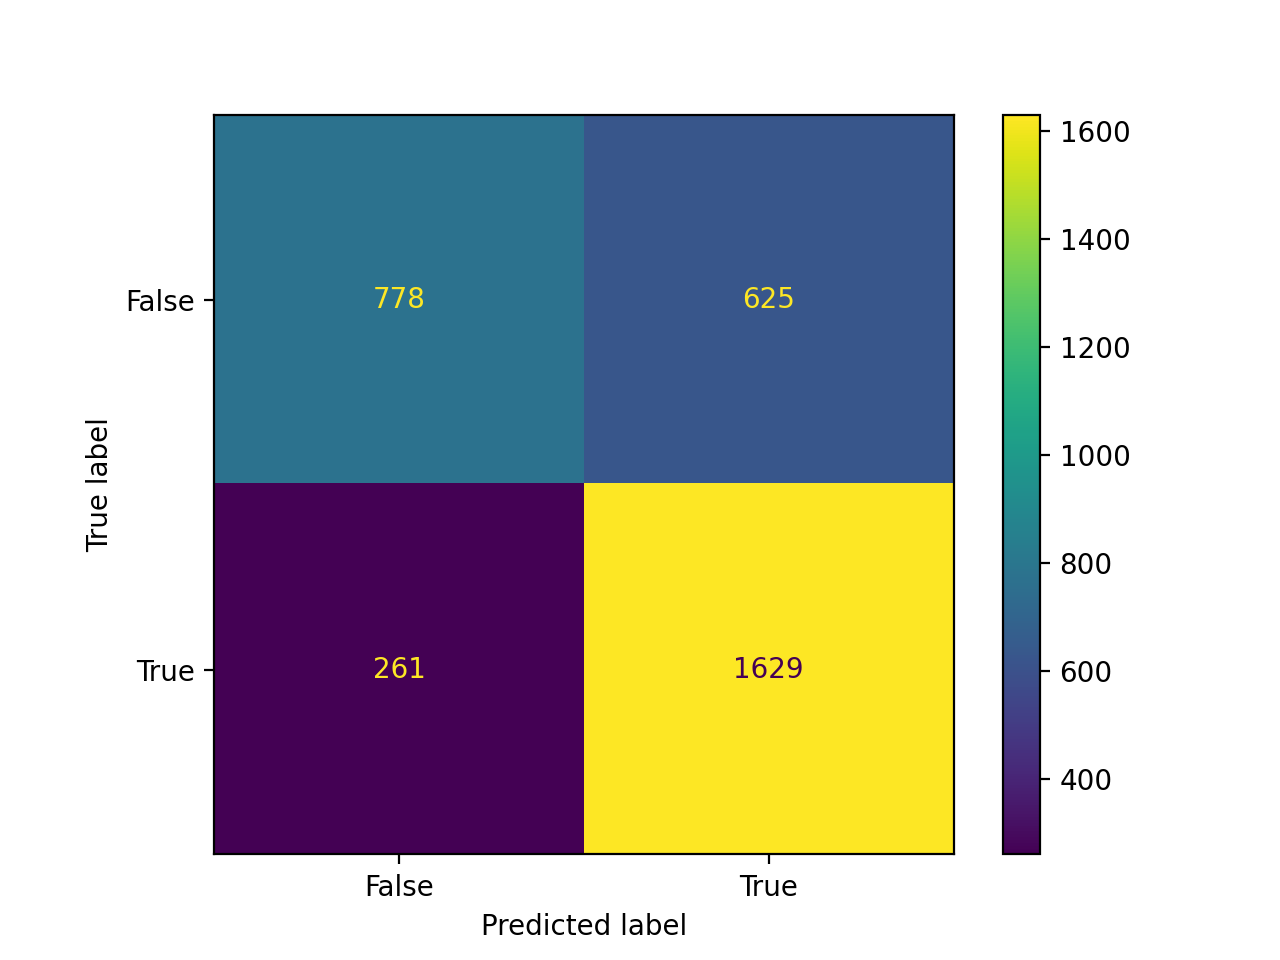

In [ ]:
# Create a confusion matrix

cm = confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()

## RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Fit with random forest classifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
# Predict the sentiment on the test data
y_pred_rf = lr_model.predict(X_test)

# Calculate and print the accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest model: {rf_accuracy * 100:.2f}%")


Accuracy of the Random Forest model: 73.09%


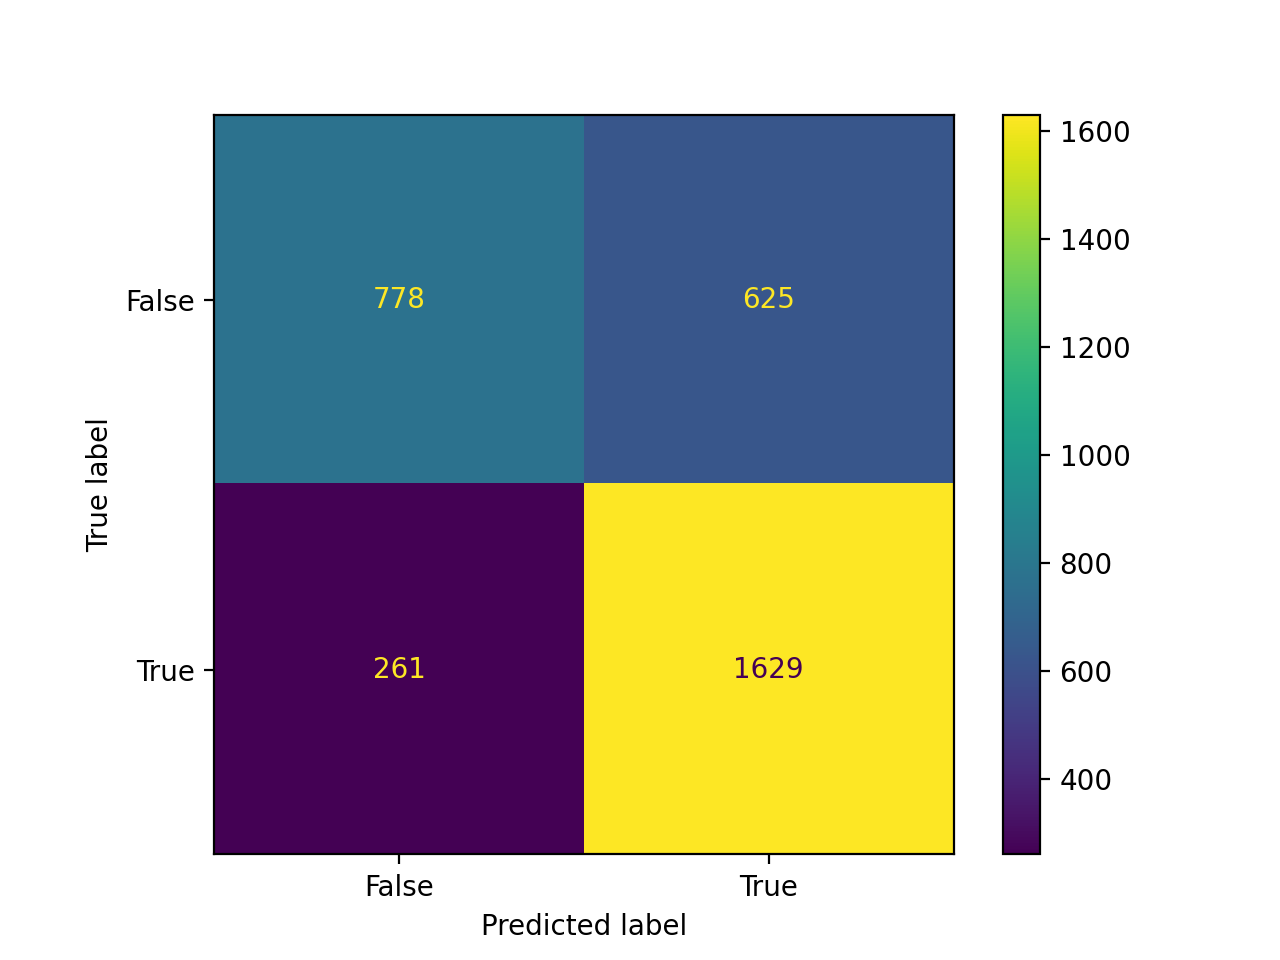

In [ ]:
cm = confusion_matrix(y_test,y_pred_rf)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()

## Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
# Fit the SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict the sentiment on the test data
y_pred_svc = svm_model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy of the SVM model: {accuracy_svc * 100:.2f}%")

Accuracy of the SVM model: 72.97%


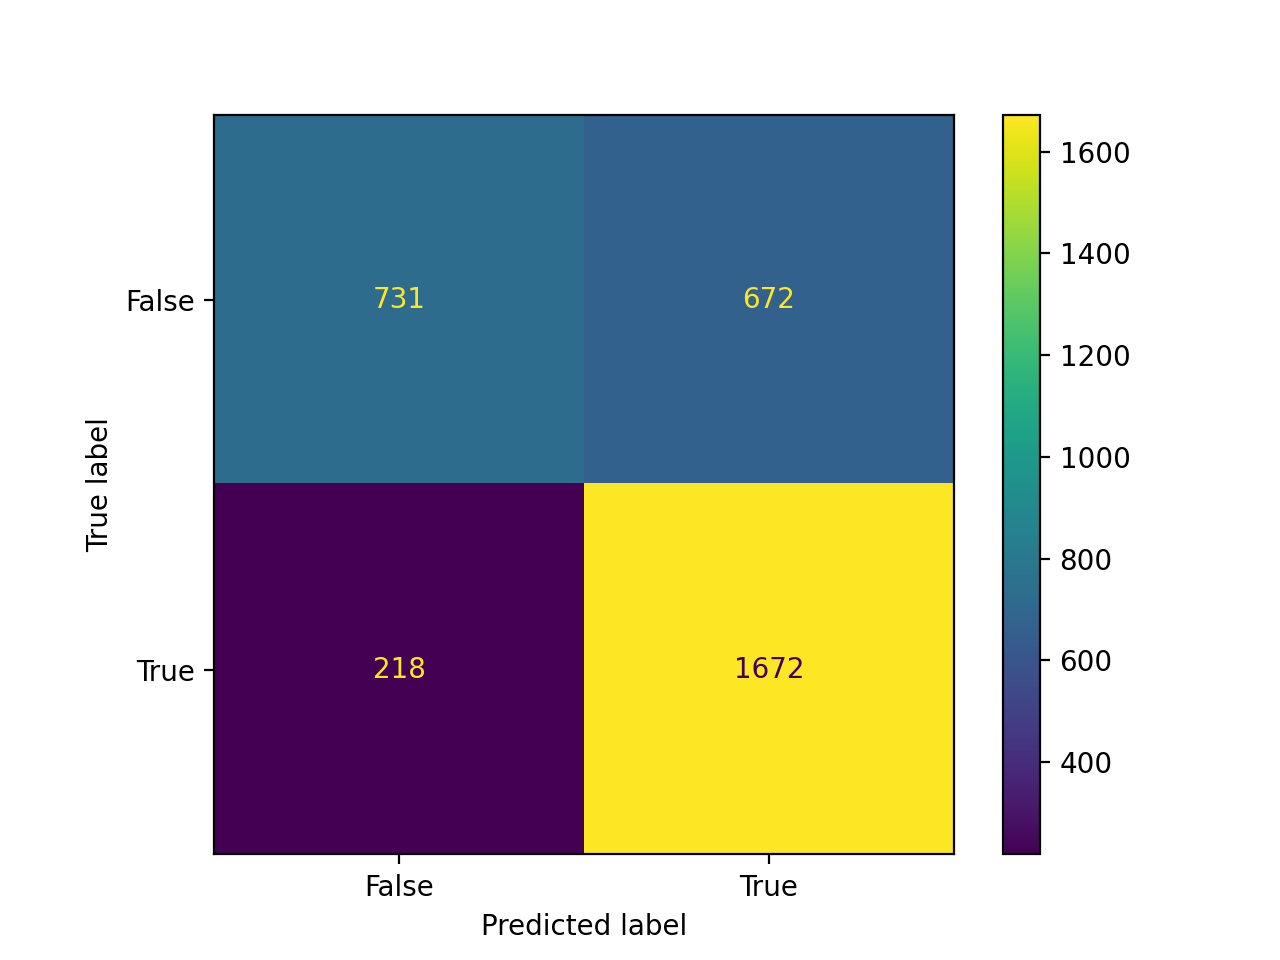

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test,y_pred_svc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
											display_labels = [False, True])

cm_display.plot()
plt.show()